In [4]:
import pandas as pd        # For reading and working with data
import matplotlib.pyplot as plt   # For charts
import seaborn as sns      # For beautiful charts

# So plots show inside the notebook
%matplotlib inline

In [5]:
df = pd.read_csv("train.csv")   # 'df' stands for dataframe
df.head()                       # Shows the first 5 rows of the data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()             # Shows total rows, columns, and missing values
df.describe()    
### 🔍 Data Overview Observations:

- The dataset contains 891 rows and 12 columns.
- There are missing values in the `Age`, `Cabin`, and `Embarked` columns.
- Most columns are numerical or categorical.
- `Fare` has a wide range, indicating passengers paid very different amounts.
# Shows statistics like mean, min, max
df.isnull().sum()     # Shows how many missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Sex'].value_counts()
df['Embarked'].value_counts()
df['Pclass'].value_counts()
### 🧑‍🤝‍🧑 Categorical Value Distribution:

- There are more male passengers than female passengers.
- Most passengers belong to the 3rd class (`Pclass = 3`), followed by 1st and 2nd.
- Most passengers embarked from port 'S' (Southampton).



Pclass
3    491
1    216
2    184
Name: count, dtype: int64

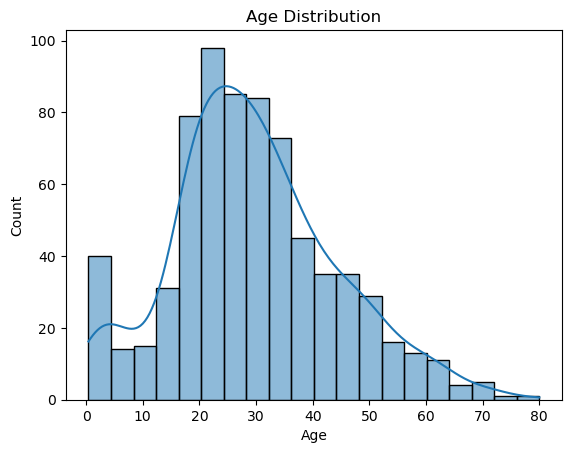

In [8]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()
### 📊 Age Distribution Observation:

- The most common age group is between 20 and 40 years.
- Very few passengers are below age 10 or above age 60.
- The distribution of age is right-skewed (more younger people than older ones).



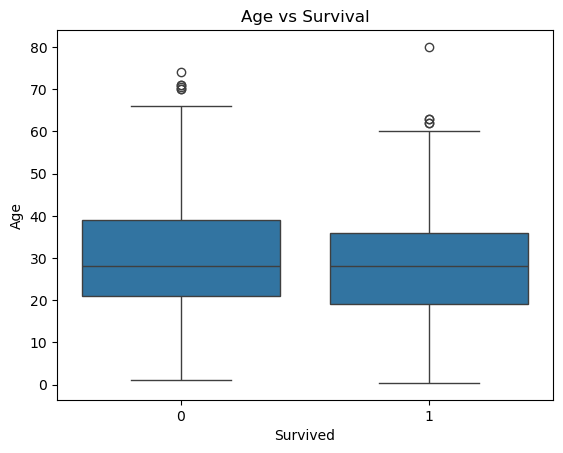

In [9]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()
### 🧳 Age vs Survival Observation:

- On average, survivors were slightly younger than non-survivors.
- There are some outliers in age among both survivors and non-survivors.



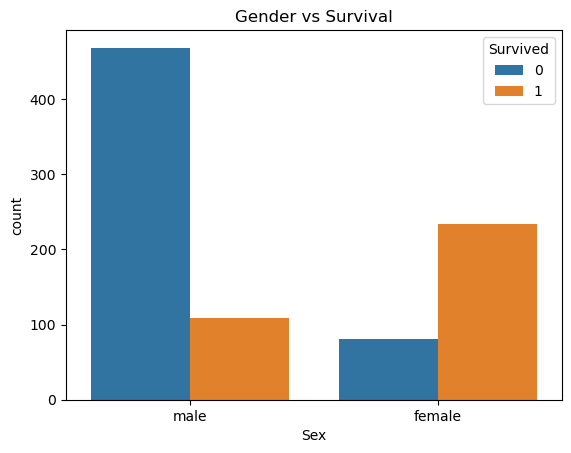

In [10]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Gender vs Survival")
plt.show()
### 🚻 Gender vs Survival Observation:

- A higher proportion of females survived compared to males.
- Most of the survivors are women, showing that women were given priority in rescue.



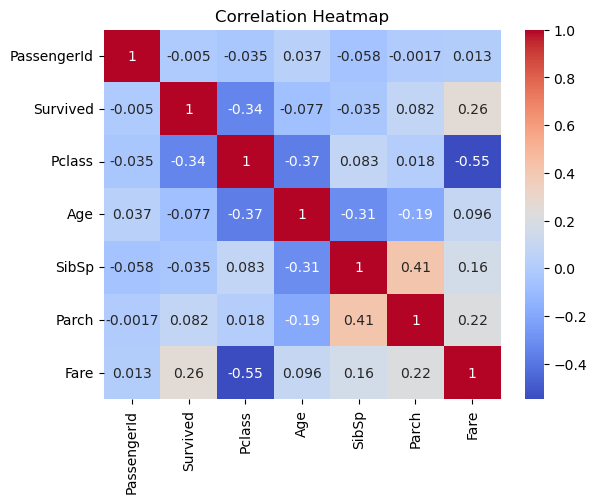

In [12]:
# First, select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Then create the heatmap with only numeric data
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
### 🔥 Correlation Heatmap Observation:

- `Fare` and `Pclass` have a moderate correlation with `Survived`.
- `Age` and `SibSp` (siblings/spouses aboard) have very low correlation with survival.
- `Pclass` is negatively correlated with survival (lower class number = higher chance to survive).


# Note: If you need to include specific columns that are currently strings but represent numbers,
# you'll need to convert them first:
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

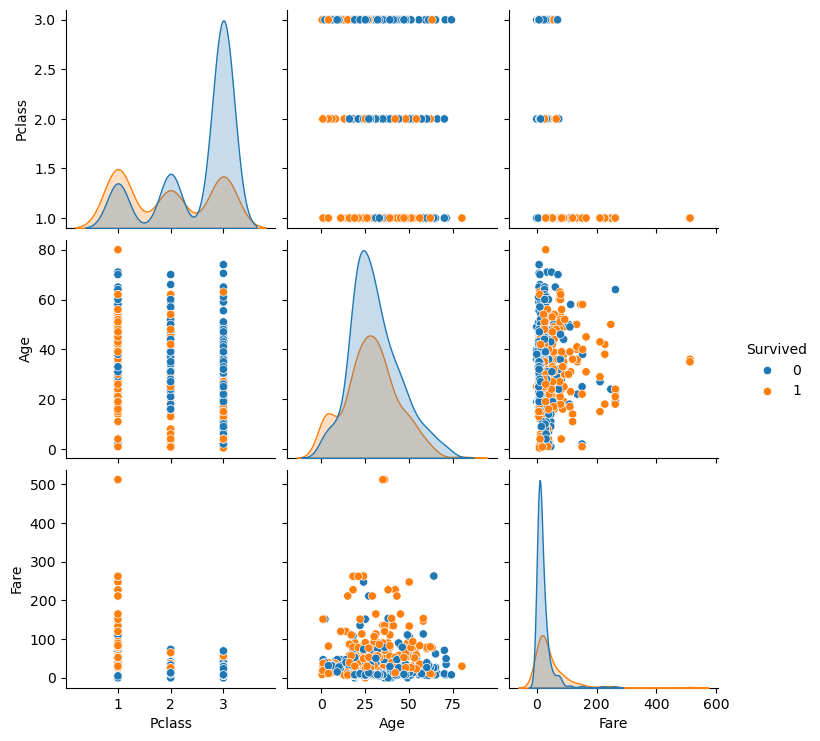

In [14]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()
